In [1]:
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2018)

/Users/nc374/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# constants


In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import check_array, check_random_state
generator = check_random_state(42)

def make_two_3d_circles(n_samples=10, r_out=1, r_in=0.7, noise=0.05):
    
    fig = plt.figure(figsize=(20,10))
    ax  = fig.add_subplot(111, projection='3d')

    # Make data
    u_out = np.random.uniform(0, 2 * np.pi, n_samples) 
    v_out = np.random.uniform(0, 2 * np.pi, n_samples)
    u_in  = np.random.uniform(0, 2 * np.pi, n_samples) 
    v_in  = np.random.uniform(0, 2 * np.pi, n_samples)
    
    x_out = r_out * np.outer(np.cos(u_out), np.sin(v_out)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    y_out = r_out * np.outer(np.sin(u_out), np.sin(v_out)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    z_out = r_out * np.outer(np.ones(np.size(u_out)), np.cos(v_out)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    x_in  = r_in  * np.outer(np.cos(u_in), np.sin(v_in)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    y_in  = r_in  * np.outer(np.sin(u_in), np.sin(v_in)) + generator.normal(scale=noise, size=(n_samples,n_samples))
    z_in  = r_in  * np.outer(np.ones(np.size(u_in)), np.cos(v_in)) + generator.normal(scale=noise, size=(n_samples,n_samples))

    # Plot the surface
    ax.scatter(x_in,  y_in,  z_in,  alpha=0.4 , color='b', s=200)
    ax.scatter(x_out, y_out, z_out, alpha=0.4 , color='r' , s=200)

    for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(20)
    for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(20)
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(20)
   
    plt.show()
    
    X = np.vstack((np.append(x_out, x_in),
                   np.append(y_out, y_in),
                   np.append(z_out, z_in))).T
    y = np.hstack([np.zeros(int(len(X)/2), dtype=np.intp),
                   np.ones (int(len(X)/2), dtype=np.intp)])
    return(X,y)

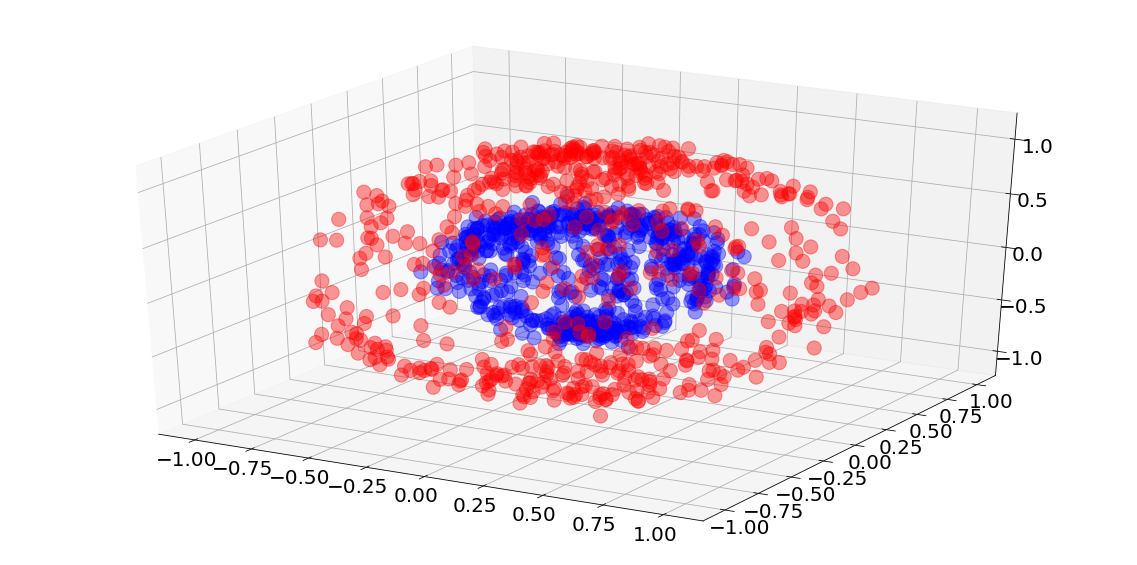

In [4]:
X, y = make_two_3d_circles(n_samples=25, r_out=1, r_in=0.5, noise=0.05)

In [5]:
print(X.shape)
print(y.shape)

(1250, 3)
(1250,)


In [6]:
epo=500
bs=32
ve=0

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(3,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model.fit(X, y, epochs=epo, batch_size=bs, verbose=ve).history
model_2_1 = model

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(3,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_4_1 = model.fit(X, y, epochs=epo, batch_size=bs, verbose=ve).history
model_4_1 = model

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(3,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_6_1 = model.fit(X, y, epochs=epo, batch_size=bs, verbose=ve).history
model_6_1 = model

In [7]:
def plot_loss_acc(loss_values, acc_values, titles, legends):
    plt.subplot(121)
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'o', label=titles[0])
    plt.title(titles[0],fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Loss',fontsize=20)
    plt.legend(legends,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.subplot(122)
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'o', label=titles[1])
    plt.title(titles[1],fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.legend(legends,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

/Users/nc374/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


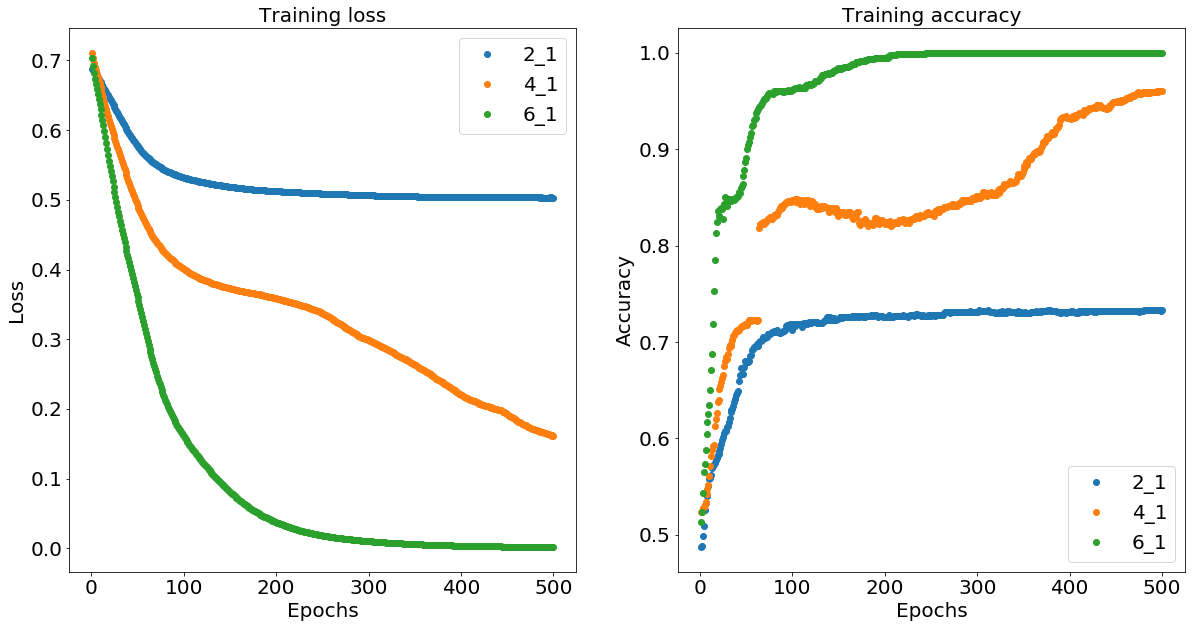

In [8]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_2_1['loss'], history_2_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plot_loss_acc(history_4_1['loss'], history_4_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plot_loss_acc(history_6_1['loss'], history_6_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn import manifold, datasets, decomposition, discriminant_analysis
X_2d = PCA(n_components=2).fit_transform(X)

y_2d = np.hstack([np.zeros(int(len(X_2d)/2), dtype=np.intp),
                  np.ones (int(len(X_2d)/2), dtype=np.intp)])

In [10]:
def plot_data_2d(X, y,title_str):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    plt.figure(figsize=(20,10))
    plt.scatter(X[y==0,0], X[y==0,1],c='r', s=200, alpha=0.4)
    plt.scatter(X[y==1,0], X[y==1,1],c='b', s=200, alpha=0.4)
    plt.title(title_str,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    plt.grid('on')
    plt.show()

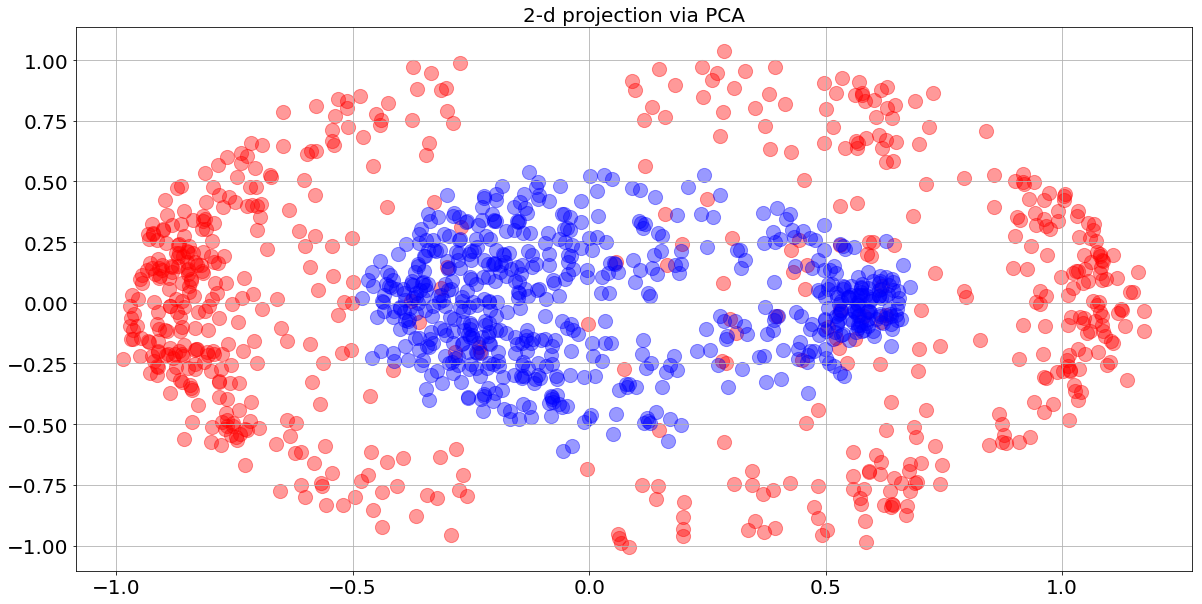

In [11]:
plot_data_2d(X_2d, y_2d,'2-d projection via PCA')

In [12]:
epo=1000

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model.fit(X_2d, y_2d, epochs=epo, batch_size=bs, verbose=ve).history
model_2_1 = model

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_4_1 = model.fit(X_2d, y_2d, epochs=epo, batch_size=bs, verbose=ve).history
model_4_1 = model

/Users/nc374/anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


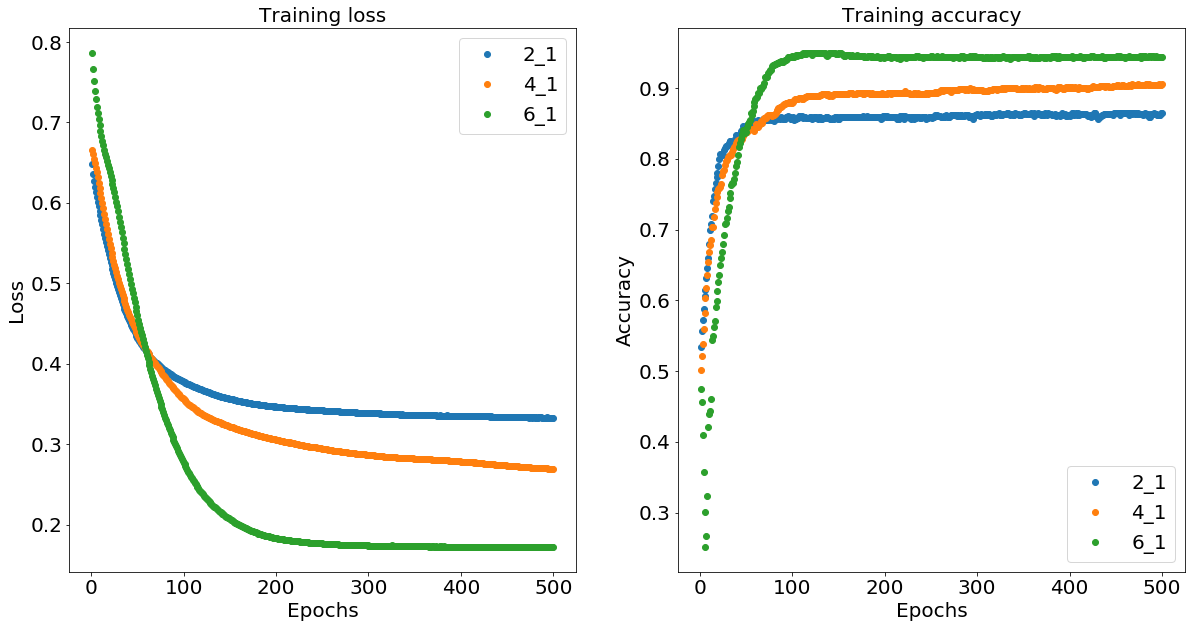

In [13]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_2_1['loss'], history_2_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plot_loss_acc(history_4_1['loss'], history_4_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plot_loss_acc(history_6_1['loss'], history_6_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plt.show()

In [14]:
from sklearn import decomposition
X_1d = PCA(n_components=1).fit_transform(X)
y_1d = np.hstack([np.zeros(int(len(X_1d)/2), dtype=np.intp),
                  np.ones (int(len(X_1d)/2), dtype=np.intp)])

In [15]:
def plot_data_1d(X, y,title_str):

    plt.figure(figsize=(20,10))
    plt.plot(X[y==1],'ob', markersize=12, alpha=0.4)
    plt.plot(X[y==0],'or', markersize=12, alpha=0.4)
    plt.title(title_str,fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid('on')
    plt.show()

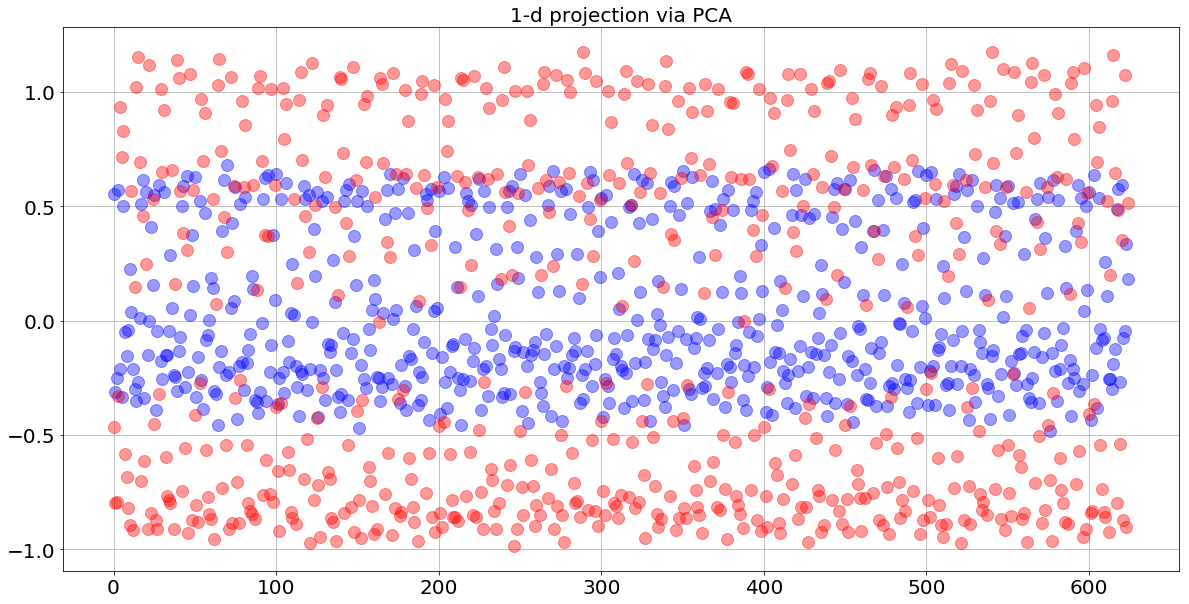

In [16]:
plot_data_1d(X_1d, y_1d,'1-d projection via PCA')

In [19]:
epo=1000

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_2_1 = model.fit(X_1d, y_1d, epochs=epo, batch_size=bs, verbose=ve).history
model_2_1 = model

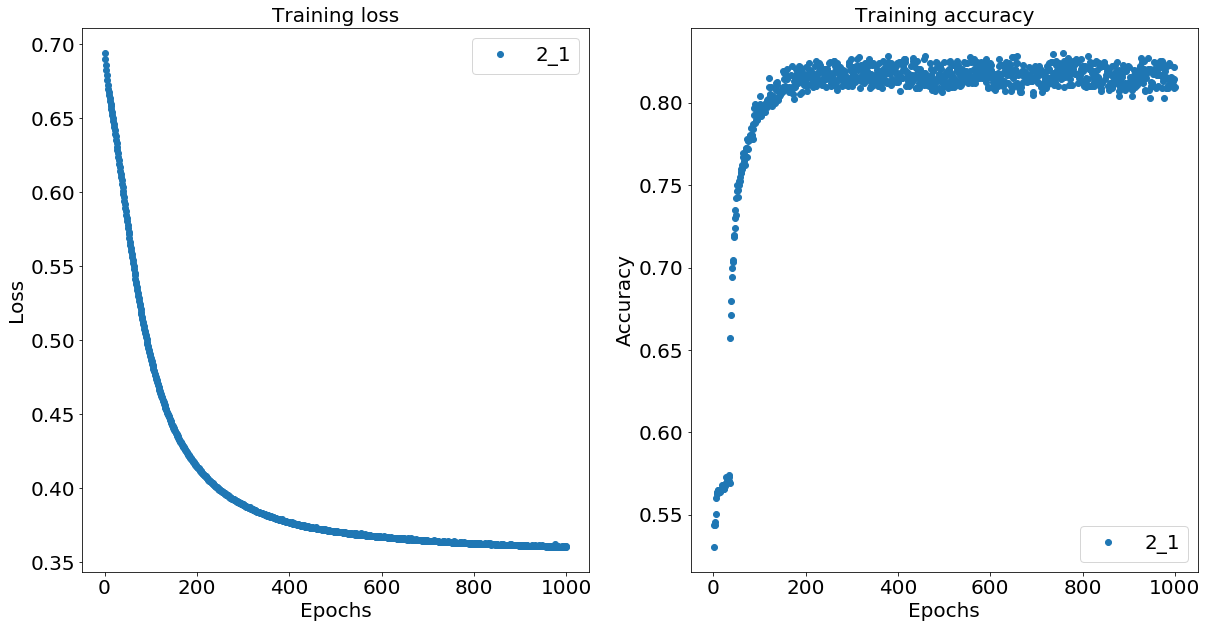

In [21]:
plt.figure(figsize=(20,10))
plot_loss_acc(history_2_1['loss'], history_2_1['acc'],
              ['Training loss','Training accuracy'],['2_1','4_1','6_1'])
plt.show()

def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='red', midcol='white', maxcol='blue'):
    """ Create a custom diverging colormap with three colors
    
    Default is blue to white to red with 11 colors.  Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

from matplotlib.colors import ListedColormap
def plot_decision_boundary(func, X, y, figsize=(20, 10)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)
    #cm = plt.cm.RdBu
    
    fig, ax = plt.subplots(figsize=figsize)
    bounds =  np.linspace(0,1,12) #[0, 0.2, 0.4, 0.6, 0.8, 1]
    plt.contourf(aa, bb, cc, cmap = custom_div_cmap(11), alpha=0.4, vmin=0, vmax=1)
    plt.colorbar(values = bounds, spacing='proportional')
    #cbar = fig.colorbar(contour)
    #cbar.ax.set_yticklabels(bounds) 
    #cbar.ax.tick_params(labelsize=20)
    
    
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.scatter(X[y==0,0], X[y==0,1],c='r', s=200, alpha=0.7)
    plt.scatter(X[y==1,0], X[y==1,1],c='b', s=200, alpha=0.7)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

    plt.grid('on')

plot_decision_boundary(lambda x: model_4_1.predict(x), X, y)
plt.title('Decision boundary, P(blue circles), for the two-circles problem',fontsize=20)
plt.show()